# OSA-CASE STUDY

### EDA process for classification

Importamos las librerías que vamos a necesitar para hacer el proceso EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix

Importamos el excel donde están los datos que vamos a tratar

In [2]:
data = pd.read_excel("../DATA/OSA_DF.xlsx")

In [3]:
data.shape

(628, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Patient   628 non-null    object 
 1   Gender    628 non-null    object 
 2   IAH       628 non-null    float64
 3   Weight    628 non-null    int64  
 4   Height    628 non-null    int64  
 5   BMI       628 non-null    float64
 6   Age       628 non-null    int64  
 7   Cervical  628 non-null    float64
 8   Smoker    628 non-null    object 
 9   Snorer    628 non-null    object 
 10  Illness   628 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 54.1+ KB


In [5]:
conditions = [
    (data['IAH'] <= 10),
    (data['IAH'] > 10) & (data['IAH'] < 30),
    (data['IAH'] >= 30)
    ]
values = ['Healthy', 'Mid', 'Severe']
data.insert(3, "OSA", '', True)
data['OSA'] = np.select(conditions, values)

In [6]:
data.select_dtypes(include=['object']).describe()

,Patient,Gender,OSA,Smoker,Snorer,Illness
count,628,628,628,628,628,628
unique,627,2,3,3,3,2
top,P0363,hombre,Healthy,no,si,si
freq,2,453,239,353,435,352


In [7]:
data.groupby('OSA').describe()

IAH                                                        Weight  \
         count       mean        std   min    25%   50%    75%    max  count   
OSA                                                                            
Healthy  239.0   4.772385   3.147026   0.0   2.25   4.6   7.50   10.0  239.0   
Mid      227.0  18.388546   5.839752  10.1  13.30  17.2  23.15   29.9  227.0   
Severe   162.0  46.021358  16.046773  30.0  34.00  40.4  53.90  108.6  162.0   

                    ...   Age       Cervical                                   \
              mean  ...   75%   max    count       mean       std   min   25%   
OSA                 ...                                                         
Healthy  81.514644  ...  53.0  77.0    239.0  38.863043  3.598644  30.0  36.0   
Mid      87.920705  ...  60.5  88.0    227.0  41.082086  3.513568  31.0  39.0   
Severe   96.345679  ...  60.0  80.0    162.0  42.623457  3.993808  33.0  41.0   

                           
          50%   75%   max  
OSA                        
Healthy  39.0  41.0  50.0  
Mid      41.0  43.0  52.0  
Severe   43.0  45.0  53.0  

[3 rows x 48 columns]

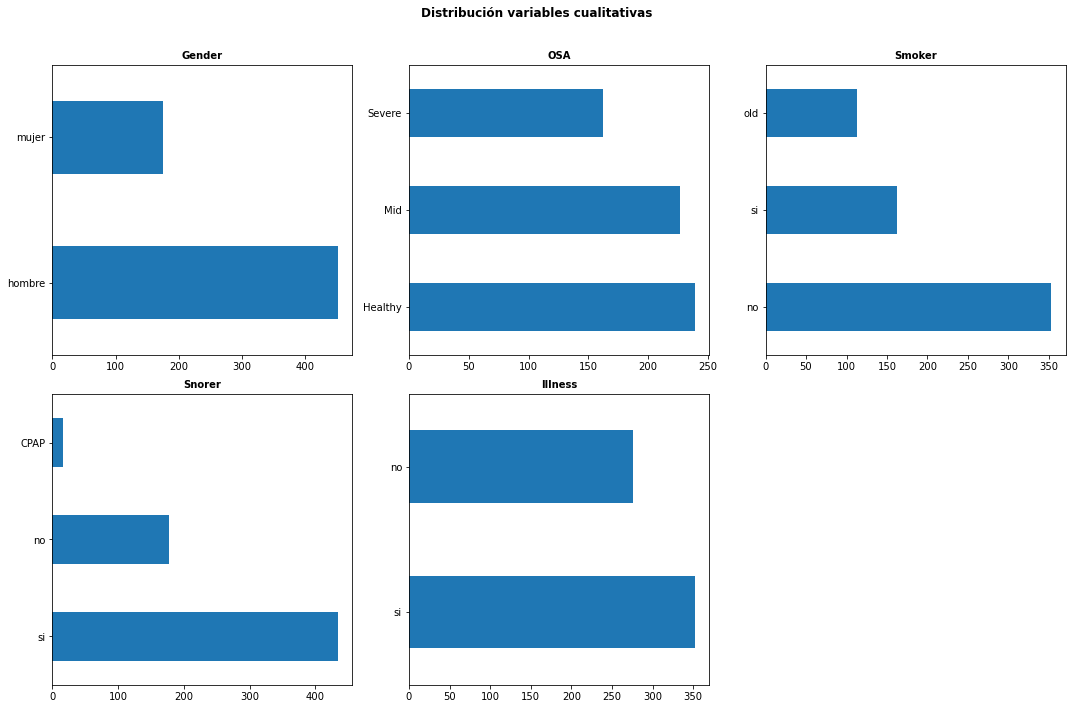

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('Patient')

for i, colum in enumerate(columnas_object):
    data[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 12, fontweight = "bold");

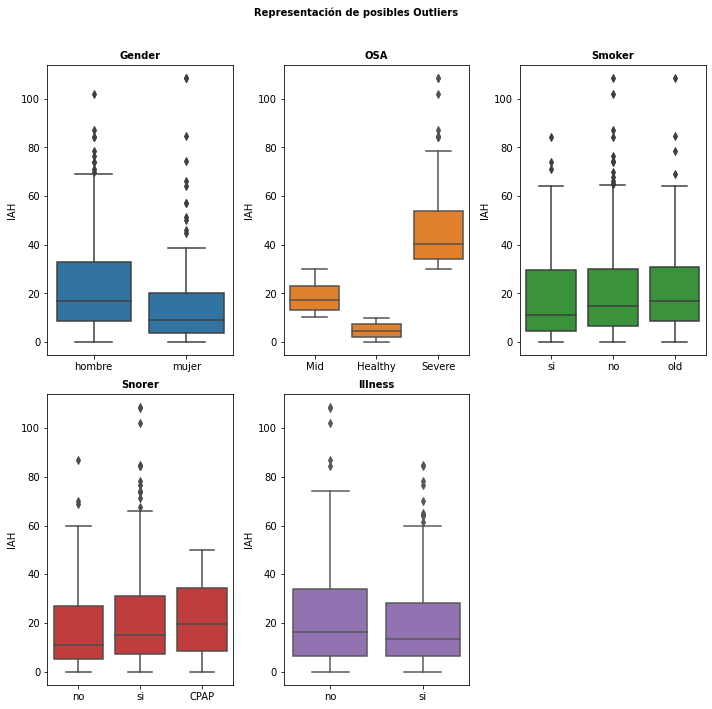

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('Patient')
for i, colum in enumerate(columnas_object):
    sns.boxplot(
        data    = data,
        x       = colum,
        y       = data['IAH'],
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Representación de posibles Outliers', fontsize = 10, fontweight = "bold");

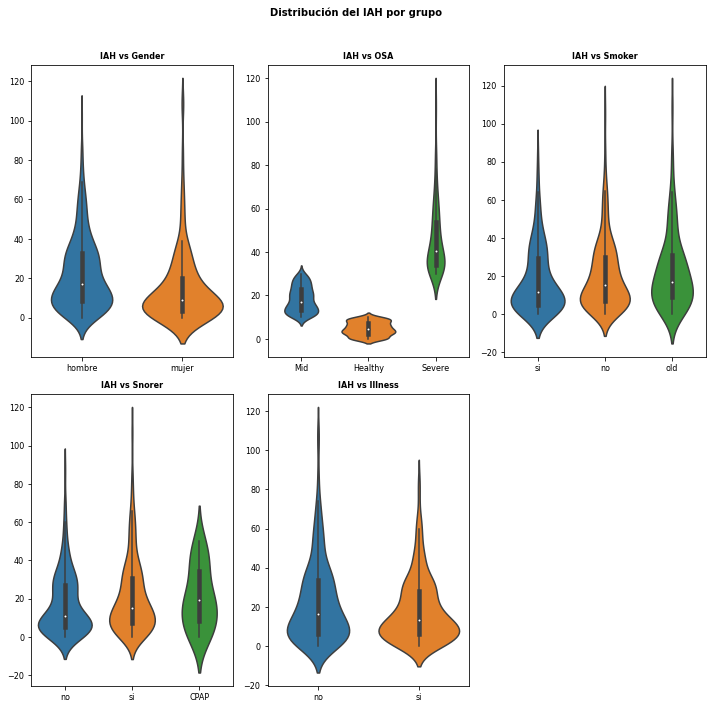

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop('Patient')
for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = data['IAH'],
        data  = data,
        ax    = axes[i]
    )
    axes[i].set_title(f"IAH vs {colum}", fontsize = 8, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del IAH por grupo', fontsize = 10, fontweight = "bold");

In [11]:
data = data[(data.Gender=='hombre') & ((data.IAH<=10) | (data.IAH>=30))]

In [12]:
#data=data.drop(['IAH'], axis=1)

In [13]:
data.to_excel("../DATA/OSA_EXTREME_DF_MALES_CLASSIFICATION.xlsx", index=False,)